<a href="https://colab.research.google.com/github/maidyjoshi/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**JOBSHEET 4**

####PRKATIKUM PCVK
Nama  : Maidy Putri Joshi

NIM   : 2141720060

Kelas : TI-3F

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt
import glob

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


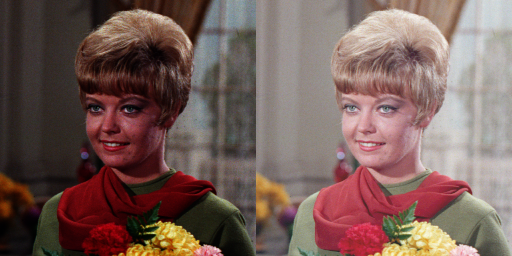

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/female.tiff')

gamma_corrected = np.power((original / 255), 1/gamma)
gamma_corrected = (gamma_corrected * 255).astype(np.uint8)

final_frame=cv.hconcat ((original,gamma_corrected))
cv2_imshow(final_frame)


2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111)
Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 2


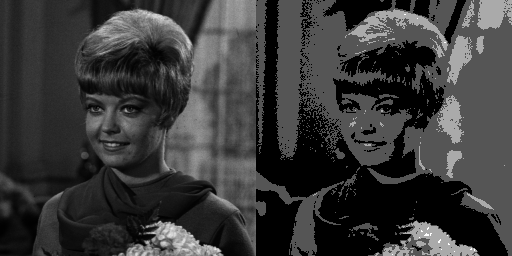

In [4]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 bit_depth = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, not a number')

level = 255 / (pow(2,bit_depth)-1)
grayscale = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
# depth_image = np.zeros(grayscale.shape, grayscale.dtype)

# for y in range(original.shape[0]):
#     for x in range(original.shape[1]):
#             depth_image[y,x]=np.clip(round(grayscale[y,x] / level) * level,0,255)

depth_image = np.round(grayscale/level) * level
depth_image = depth_image.astype(np.uint8)

final_frame=cv.hconcat ((grayscale,depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob)

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 5
29.095996791585165


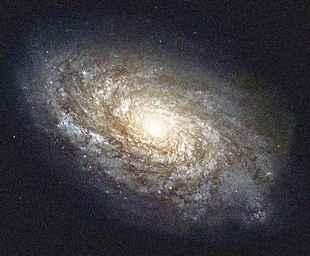

In [33]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/SEMESTER5/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

###**Citra Average 10**

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 10
28.987203845339348


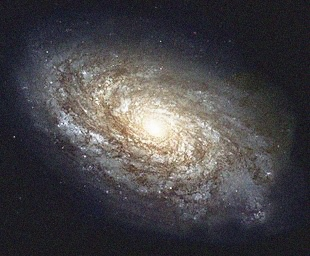

In [34]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/SEMESTER5/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

####**Citra Average 20**

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 20
28.942444869173


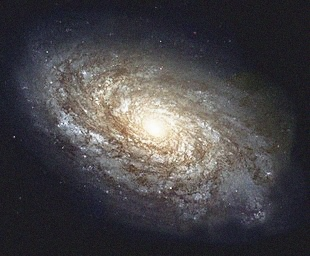

In [35]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/SEMESTER5/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

####**Citra Average 40**

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 40
28.915612154364183


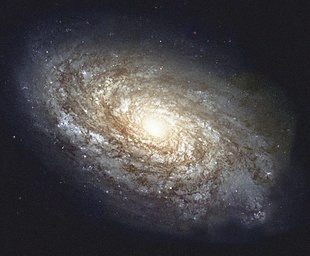

In [36]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/SEMESTER5/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

####**Citra Average 80**

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 80
28.902514375282685


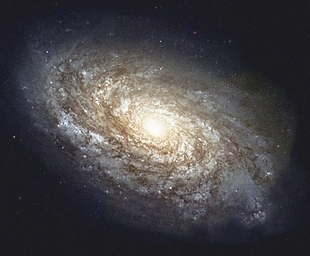

In [37]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/SEMESTER5/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

####**Citra Average 100**

 Simulasi Image Depth 
----------------------------------
Masukkan nilai Bit Depth: 100
28.90132073328435


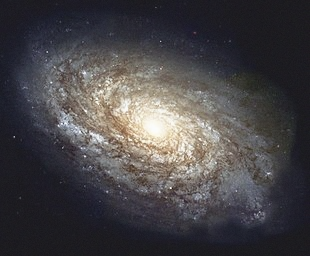

In [38]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai Bit Depth: '))
except ValueError:
 print('Error, masukkan nilai!')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/SEMESTER5/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

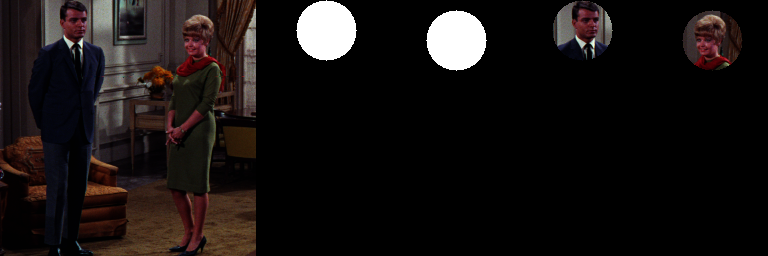

In [21]:
couple_img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(couple_img, mask)

final_frame = cv.hconcat((couple_img, mask,masked_image))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu

#**NOT (KOMPLEMEN)**

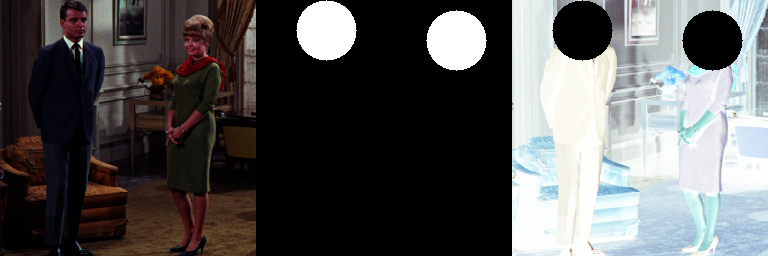

In [22]:
couple_img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = ~couple_img & ~mask

final_frame = cv.hconcat((couple_img, mask,masked_image))
cv2_imshow(final_frame)

#**OR (ATAU)**

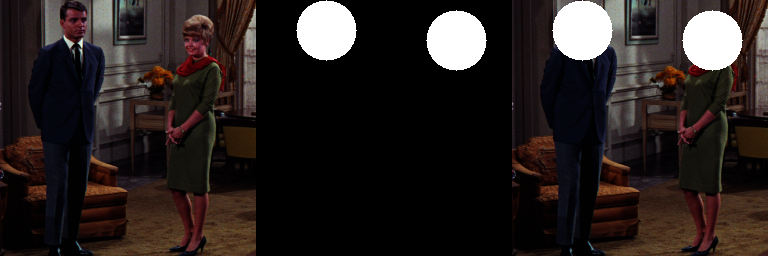

In [23]:
couple_img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_or(couple_img, mask)

final_frame = cv.hconcat((couple_img, mask,masked_image))
cv2_imshow(final_frame)

#**AND (DAN)**

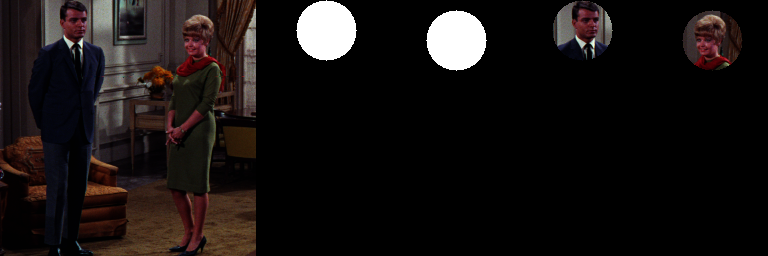

In [24]:
couple_img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(couple_img, mask)

final_frame = cv.hconcat((couple_img, mask,masked_image))
cv2_imshow(final_frame)

#**NAND (NOT AND)**

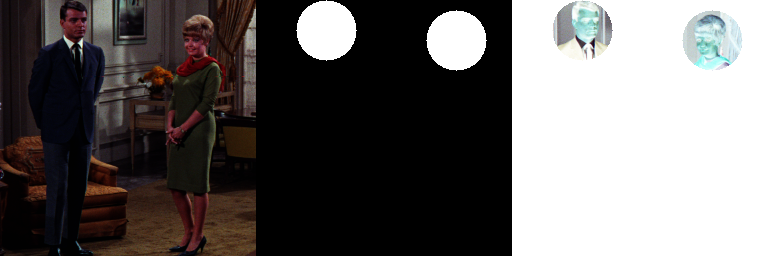

In [25]:
# Gambar pasangan asli
couple_img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/couple.tiff')

# Membuat maska dengan dua lingkaran
center1 = (70, 30)
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

# Menggabungkan operasi NOT (NAND) antara gambar asli dan mask
nand_result = cv.bitwise_not(cv.bitwise_and(couple_img, mask))

# Menampilkan hasil
final_frame = cv.hconcat((couple_img, mask, nand_result))
cv2_imshow(final_frame)

#**XOR (EXLUSIVE OR)**

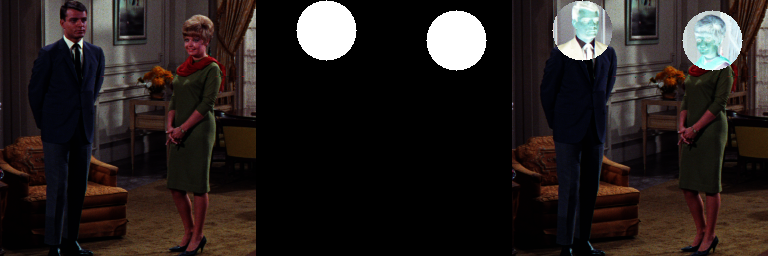

In [26]:
couple_img = cv.imread('/content/drive/MyDrive/SEMESTER5/PCVK/couple.tiff')

center1 = (70, 30) # h,v
radius1 = 30
center2 = (200, 40)
radius2 = 30

mask = np.zeros_like(couple_img)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_xor(couple_img, mask)

final_frame = cv.hconcat((couple_img, mask,masked_image))
cv2_imshow(final_frame)